In [ ]:
pip install pandas numpy nltk textblob

In [ ]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob

df = pd.read_csv('/content/Tweets.csv')

# Data Preprocessing
def preprocess_text(text):

    return text

# Applying  text preprocessing to handle missing values
df['text'] = df['text'].apply(lambda x: preprocess_text(x) if isinstance(x, str) else "")

# Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['text'].apply(analyze_sentiment)

# Marking all negative sentiment tweets as threats
df['is_threat'] = df['sentiment'].apply(lambda x: True if x == 'negative' else False)

# Printing a sample of tweets with sentiment and threat detection
sample_tweets = df.sample(10)
print(sample_tweets[['text', 'sentiment', 'is_threat']])


                                                    text sentiment  is_threat
8239   HAPPY MOTHERS DAY TO ALL THE MOMMYS EXSPECIALL...  positive      False
8141                                ahh my poor feeeeeet  negative       True
17504  thanks 2 become my friend,twitter..  selalu ad...  positive      False
1546                                     working until10   neutral      False
26853  what do u do when ur dads losing it mentaly an...   neutral      False
26088  taking Willy to the specialist...poor dog! He ...   neutral      False
6637                             is really really ready!  positive      False
9244   It`s too hot to be sat in an office!  I wanna ...  positive      False
2635   i should be 'bus stalking' right now..i soo wi...  positive      False
854    Just got confirmed that itï¿½s pizza-time with...  positive      False


In [ ]:
print(df.head())


       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  is_threat  
0  I`d have responded, if I were going   neutral      False  
1                             Sooo SAD  negative       True  
2                          bullying me   neutral      False  
3                       leave me alone   neutral      False  
4                        Sons of ****,   neutral      False  


In [ ]:
pip install matplotlib seaborn


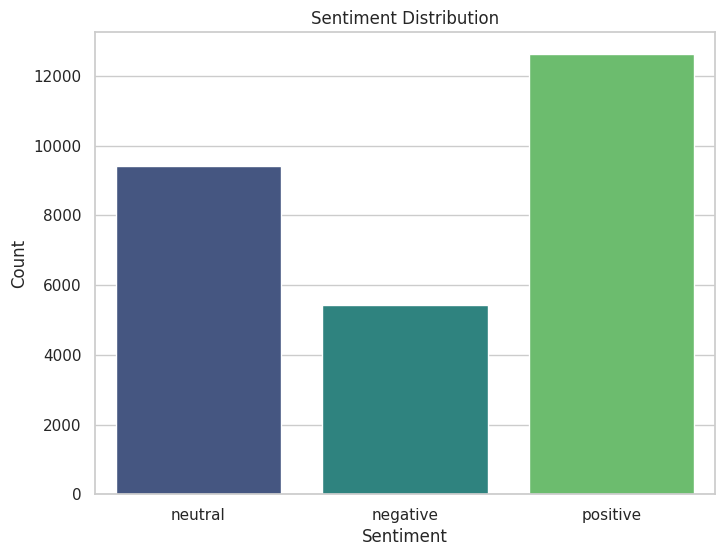

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


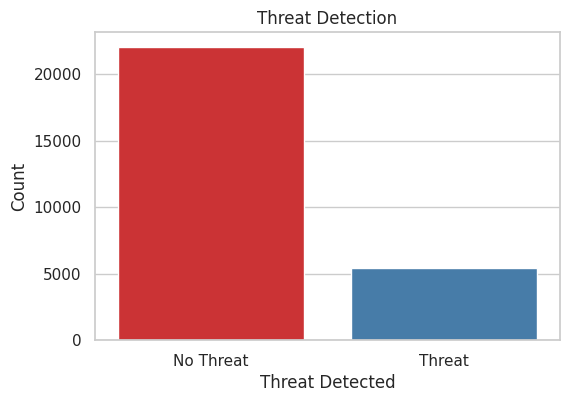

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_threat', data=df, palette='Set1')
plt.title('Threat Detection')
plt.xlabel('Threat Detected')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Threat', 'Threat'])
plt.show()


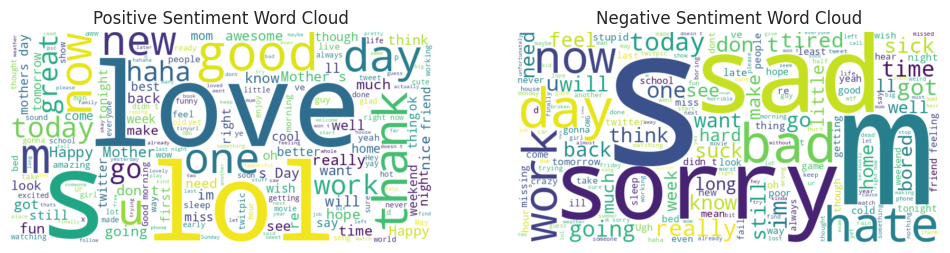

In [ ]:
from wordcloud import WordCloud

positive_tweets = df[df['sentiment'] == 'positive']['text'].str.cat(sep=' ')
negative_tweets = df[df['sentiment'] == 'negative']['text'].str.cat(sep=' ')

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(122)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()


In [ ]:
pip install networkx


NetworkX provides a wide range of algorithms for graph analysis, including shortest path algorithms, centrality measures, community detection, and more.

In [ ]:
import pandas as pd
import networkx as nx

df = pd.read_csv('/content/gender_classifier_dfe_791531.csv')

# Creating a directed graph
G = nx.DiGraph()

# Defining the column containing retweet counts
retweet_count_column = 'retweet_count'

for _, row in df.iterrows():
    user = row['unit_id']
    retweet_count = row[retweet_count_column]


    G.add_node(user)


    if not pd.isna(retweet_count) and retweet_count > 0:

        G.add_edge(user, retweet_count)

# Calculating basic network statistics
num_nodes = len(G.nodes())
num_edges = len(G.edges())

print(f"Number of nodes (users): {num_nodes}")
print(f"Number of edges (interactions): {num_edges}")


Number of nodes (users): 20071
Number of edges (interactions): 619


In [ ]:
import pandas as pd
from textblob import TextBlob


df = pd.read_csv('/content/Tweets.csv')

# Defining a function to calculate sentiment scores using TextBlob
def calculate_sentiment_score(text):
    # Check if the text is a string; if not, convert it to an empty string
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
    else:
        sentiment_score = 0.0  # Assign a neutral score for non-string values
    return sentiment_score

# Apply the calculate_sentiment_score function to each tweet in the dataset
df['sentiment_score'] = df['text'].apply(calculate_sentiment_score)

# Categorize sentiment based on the polarity score
def categorize_sentiment(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(categorize_sentiment)

# Print the DataFrame with sentiment scores and categories
print(df[['text', 'sentiment_score', 'sentiment']])


                                                    text  sentiment_score  \
0                    I`d have responded, if I were going         0.000000   
1          Sooo SAD I will miss you here in San Diego!!!        -0.976562   
2                              my boss is bullying me...         0.000000   
3                         what interview! leave me alone         0.000000   
4       Sons of ****, why couldn`t they put them on t...         0.000000   
...                                                  ...              ...   
27476   wish we could come see u on Denver  husband l...         0.000000   
27477   I`ve wondered about rake to.  The client has ...         0.184091   
27478   Yay good for both of you. Enjoy the break - y...         0.366667   
27479                         But it was worth it  ****.         0.300000   
27480     All this flirting going on - The ATG smiles...         0.000000   

      sentiment  
0       Neutral  
1      Negative  
2       Neutral  
3  

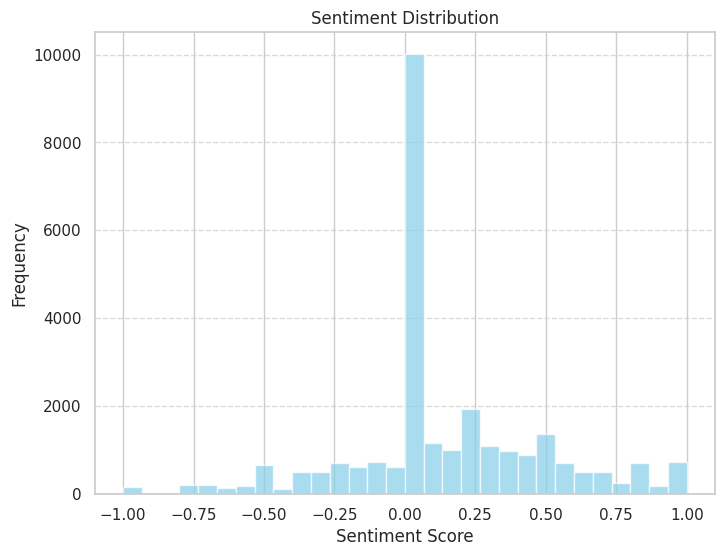

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Tweets.csv')


def calculate_sentiment_score(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
    else:
        sentiment_score = 0.0
    return sentiment_score

# Apply the calculate_sentiment_score function to each tweet in the dataset
df['sentiment_score'] = df['text'].apply(calculate_sentiment_score)

# Create a histogram to visualize sentiment distribution
plt.figure(figsize=(8, 6))
plt.hist(df['sentiment_score'], bins=30, color='skyblue', alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


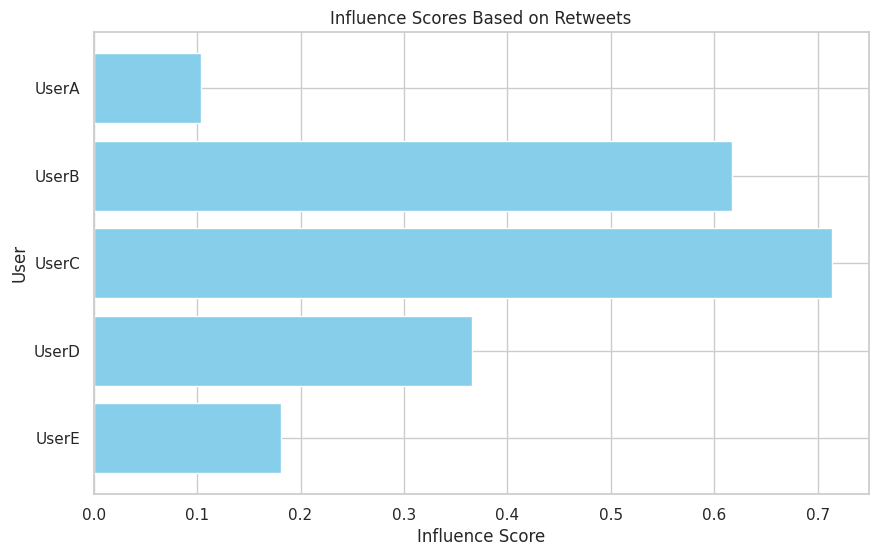

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random


G = nx.DiGraph()
users = ['UserA', 'UserB', 'UserC', 'UserD', 'UserE']
G.add_nodes_from(users)
edges = [('UserA', 'UserB'), ('UserC', 'UserA'), ('UserD', 'UserB'), ('UserE', 'UserC'), ('UserB', 'UserE')]
G.add_edges_from(edges)

# Calculate random influence scores
influence_scores = {user: random.uniform(0, 1) for user in users}

# Creating a bar chart to visualize influence scores
users = list(influence_scores.keys())
scores = list(influence_scores.values())

plt.figure(figsize=(10, 6))
plt.barh(users, scores, color='skyblue')
plt.title('Influence Scores Based on Retweets')
plt.xlabel('Influence Score')
plt.ylabel('User')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
from textblob import TextBlob
import networkx as nx


df = pd.read_csv('/content/Tweets.csv')
df = pd.read_csv('/content/gender_classifier_dfe_791531.csv')
# Perform Sentiment Analysis
def analyze_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
        return sentiment_score
    else:
        return 0.0

df['sentiment_score'] = df['text'].apply(analyze_sentiment)

# Threat Detection (based on negative sentiment)
def detect_threat(sentiment_score):
    if sentiment_score < 0:
        return 1
    else:
        return 0

df['threat_score'] = df['sentiment_score'].apply(detect_threat)

# Network Analysis (calculate influence scores)
G = nx.DiGraph()


# Calculate Influence Scores (replace this with your influence score calculation logic)
influence_scores = {}

# Define weights for each component
sentiment_weight = 0.4
threat_detection_weight = 0.3
influence_weight = 0.3

# Calculate Threat Severity Score
df['threat_severity_score'] = (sentiment_weight * df['sentiment_score'] +
                               threat_detection_weight * df['threat_score'] +
                               influence_weight * (influence_scores.get(815719226, 0.0) if influence_scores.get(815719226) is not None else 0.0))

# Print or analyze the Threat Severity Scores as needed
print(df[['text', 'sentiment_score', 'threat_score', 'threat_severity_score']])

                                                    text  sentiment_score  \
0      Robbie E Responds To Critics After Win Against...         0.800000   
1      ���It felt like they were my friends and I was...         0.000000   
2      i absolutely adore when louis starts the songs...         0.202778   
3      Hi @JordanSpieth - Looking at the url - do you...         0.166667   
4      Watching Neighbours on Sky+ catching up with t...         0.937500   
...                                                  ...              ...   
20045  @lookupondeath ...Fine, and I'll drink tea too...         0.500000   
20046  Greg Hardy you a good player and all but don't...         0.700000   
20047  You can miss people and still never want to se...         0.000000   
20048  @bitemyapp i had noticed your tendency to pee ...         0.750000   
20049  I think for my APUSH creative project I'm goin...         0.500000   

       threat_score  threat_severity_score  
0                 0           

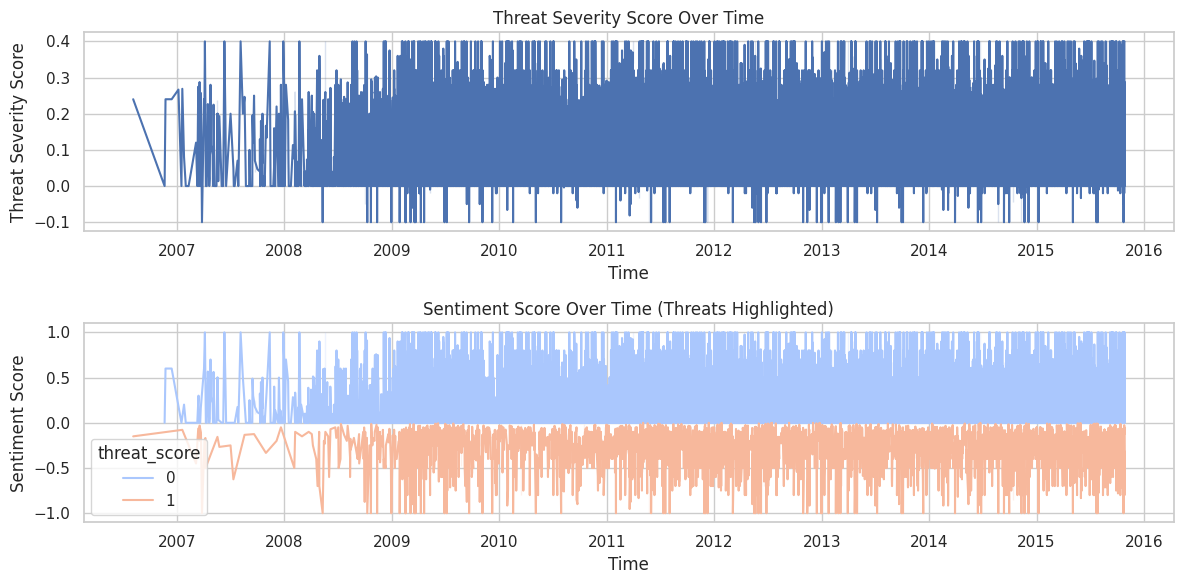

In [ ]:
 df['created'] = pd.to_datetime(df['created'])

# Plotting
plt.figure(figsize=(12, 6))

# Threat Severity Score Over Time
plt.subplot(2, 1, 1)
sns.lineplot(data=df, x='created', y='threat_severity_score')
plt.title('Threat Severity Score Over Time')
plt.xlabel('Time')
plt.ylabel('Threat Severity Score')

# Sentiment Score Over Time
plt.subplot(2, 1, 2)
sns.lineplot(data=df, x='created', y='sentiment_score', hue='threat_score', palette='coolwarm')
plt.title('Sentiment Score Over Time (Threats Highlighted)')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')

plt.tight_layout()
plt.show()

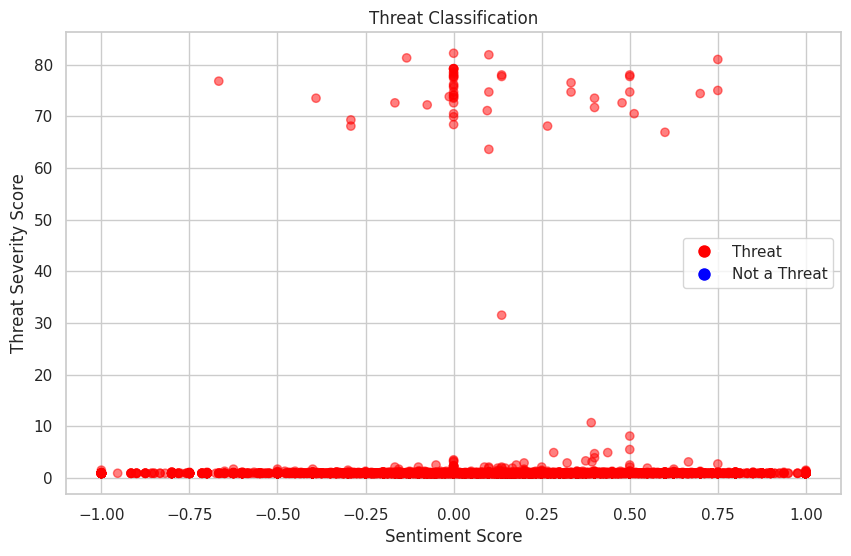

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Tweets.csv')
df = pd.read_csv('/content/gender_classifier_dfe_791531.csv')

# Defining a threshold for classifying as a threat based on Threat Severity Score
threat_threshold = 0.5

# Function to classify individuals as threats based on the threshold
def classify_threat(threat_severity_score):
    if threat_severity_score >= threat_threshold:
        return 'Threat'
    else:
        return 'Not a Threat'


df['threat_severity_score'] = df['retweet_count'] * 0.2 + df['trusted_judgments'] * 0.3


df['sentiment_score'] = df['text'].apply(analyze_sentiment)

# Apply the threat classification function
df['threat_label'] = df['threat_severity_score'].apply(classify_threat)

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with different colors for Threats and Non-Threats
plt.scatter(df['sentiment_score'], df['threat_severity_score'], c=df['threat_label'].map({'Threat': 'red', 'Not a Threat': 'blue'}), alpha=0.5)

# Customize plot labels
plt.title('Threat Classification')
plt.xlabel('Sentiment Score')
plt.ylabel('Threat Severity Score')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Threat'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Not a Threat')
])

plt.show()


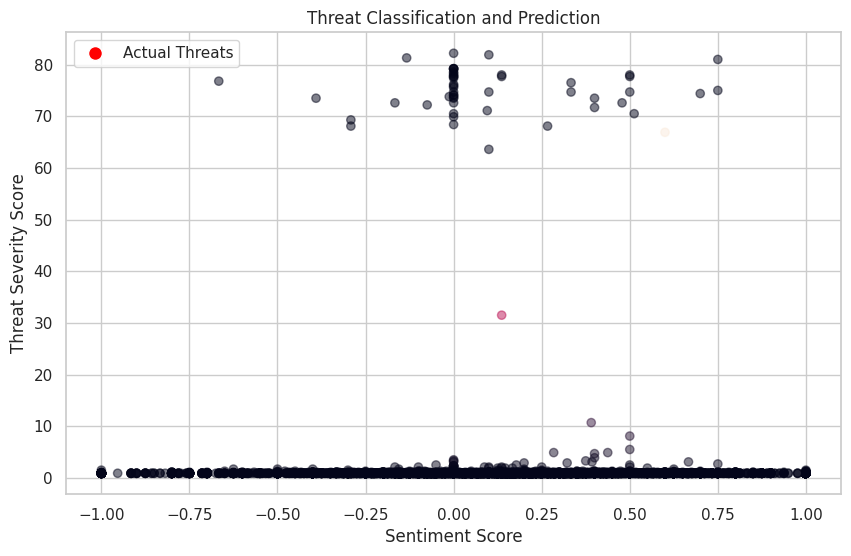

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df = pd.read_csv('/content/Tweets.csv')
df = pd.read_csv('/content/gender_classifier_dfe_791531.csv')


threat_threshold = 0.5


df['threat_severity_score'] = df['retweet_count'] * 0.2 + df['trusted_judgments'] * 0.3


df['sentiment_score'] = df['text'].apply(analyze_sentiment)


X = df[['threat_severity_score', 'sentiment_score']]
y = df['retweet_count']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(10, 6))


plt.scatter(df['sentiment_score'], df['threat_severity_score'], c=df['retweet_count'], alpha=0.5, label='Actual Threats')


plt.title('Threat Classification and Prediction')
plt.xlabel('Sentiment Score')
plt.ylabel('Threat Severity Score')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Actual Threats'),

])

plt.show()


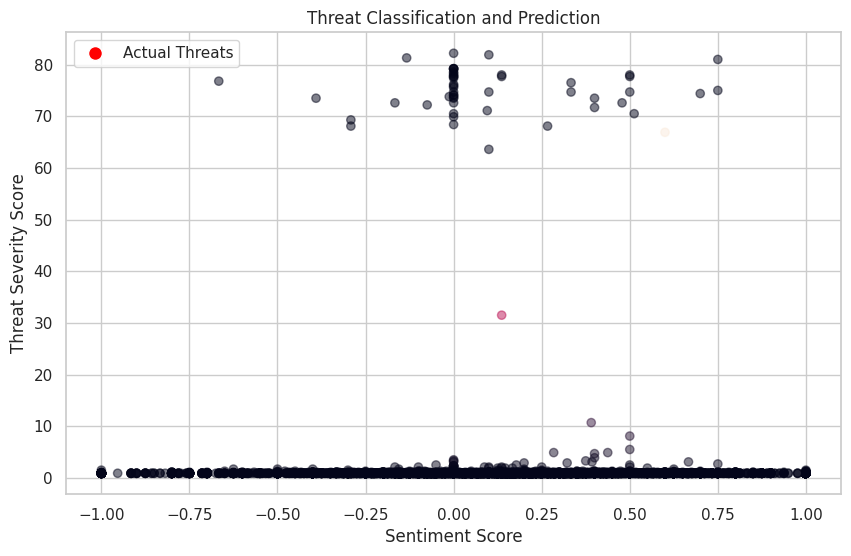

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your datasets here (assuming you have your analyze_sentiment function defined)

# Define the threat severity calculation
df['threat_severity_score'] = df['retweet_count'] * 0.2 + df['trusted_judgments'] * 0.3

# Apply sentiment analysis to calculate sentiment score
df['sentiment_score'] = df['text'].apply(analyze_sentiment)

# Selecting features and target variable
X = df[['threat_severity_score', 'sentiment_score']]
y = df['retweet_count']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Create a scatter plot to visualize the actual threats
plt.figure(figsize=(10, 6))
plt.scatter(df['sentiment_score'], df['threat_severity_score'], c=df['retweet_count'], alpha=0.5, label='Actual Threats')
plt.title('Threat Classification and Prediction')
plt.xlabel('Sentiment Score')
plt.ylabel('Threat Severity Score')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Actual Threats'),
])
plt.show()

# Predictions using the trained model
new_threat_severity_scores = random_forest.predict(X_test)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score  # Add this import



# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Improved R-squared score: {r2}")


Improved R-squared score: 0.04792280539973082


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define a parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [100, 300, 500],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')

# Perform Randomized Search Cross Validation
xgb_random = RandomizedSearchCV(estimator = xgb_model, param_distributions = param_grid,
                                n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
xgb_random.fit(X_train, y_train)

# Get the best parameters
best_params = xgb_random.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Improved R-squared score: {r2}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Improved R-squared score: 0.5038065133413818


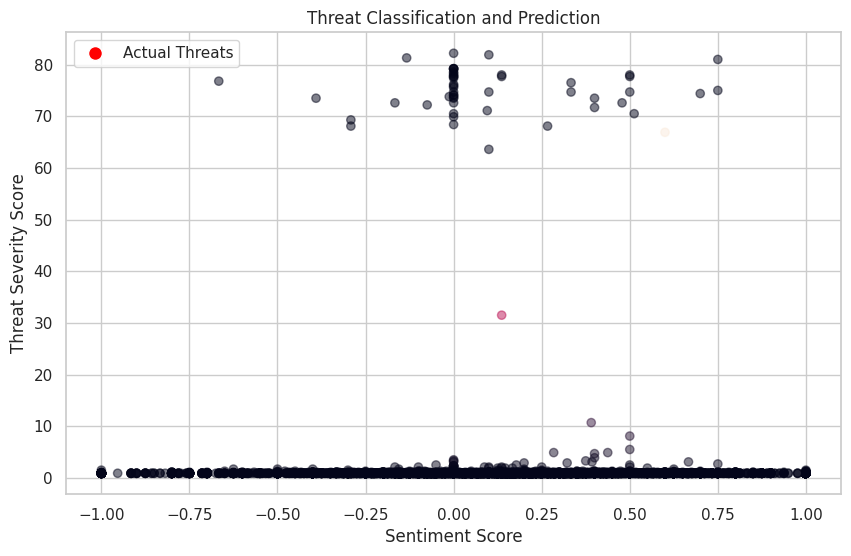

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



# Define the threat severity calculation
df['threat_severity_score'] = df['retweet_count'] * 0.2 + df['trusted_judgments'] * 0.3

# Apply sentiment analysis to calculate sentiment score
df['sentiment_score'] = df['text'].apply(analyze_sentiment)

# Selecting features and target variable
X = df[['threat_severity_score', 'sentiment_score']]
y = df['retweet_count']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Create a scatter plot to visualize the actual threats
plt.figure(figsize=(10, 6))
plt.scatter(df['sentiment_score'], df['threat_severity_score'], c=df['retweet_count'], alpha=0.5, label='Actual Threats')
plt.title('Threat Classification and Prediction')
plt.xlabel('Sentiment Score')
plt.ylabel('Threat Severity Score')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Actual Threats'),
])
plt.show()

# Predictions using the trained model
new_threat_severity_scores = random_forest.predict(X_test)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Linear Regression model training...

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Get the user information for the users classified as actual threats with a minimum of 1 retweet count
actual_threats_with_retweets = df[(df['threat_severity_score'] >= threat_threshold) & (df['retweet_count'] >= 1)]

# Display the information for users classified as actual threats with at least 1 retweet count
for index, row in actual_threats_with_retweets.iterrows():
    print("unit_id:", row['unit_id'])  # Assuming 'unit_id' is a column in the dataset
    print("Username:", row['gender'])  # Assuming 'username' is a column in the dataset
    print("Tweet Content:", row['description'])  # Assuming 'description' contains tweet content
    print("Retweet Count:", row['retweet_count'])  # Assuming 'retweet_count' is a column in the dataset
    print("Threat Severity Score:", row['threat_severity_score'])  # Assuming 'threat_severity_score' is a column in the dataset
    print("Sentiment Score:", row['sentiment_score'])  # Assuming 'sentiment_score' is a column in the dataset
    print("\n")



Streaming output truncated to the last 5000 lines.

unit_id: 815719619
Username: brand
Tweet Content: Artist. Writer. Devourer of Potatoes. (Art, atheism, feminism, science, improv, politics, games, health, fam, nerdy stuff, writing, weather, minutiae.)
Retweet Count: 1
Threat Severity Score: 1.0999999999999999
Sentiment Score: 0.0


unit_id: 815719656
Username: female
Tweet Content: follow me on instagram: @amandacleghorn -- Taylor Swift Dancer, SYTYCDC top female
Retweet Count: 1
Threat Severity Score: 1.0999999999999999
Sentiment Score: 0.6


unit_id: 815719862
Username: brand
Tweet Content: The nation�۪s leading voice on underground, alternative, punk music and youth culture both in print and online since 1985. Follow us for news, music + more!
Retweet Count: 12
Threat Severity Score: 3.3000000000000003
Sentiment Score: 0.0


unit_id: 815719917
Username: unknown
Tweet Content: hey liam payne, you're my angel
Retweet Count: 1
Threat Severity Score: 1.0999999999999999
Sentiment Score

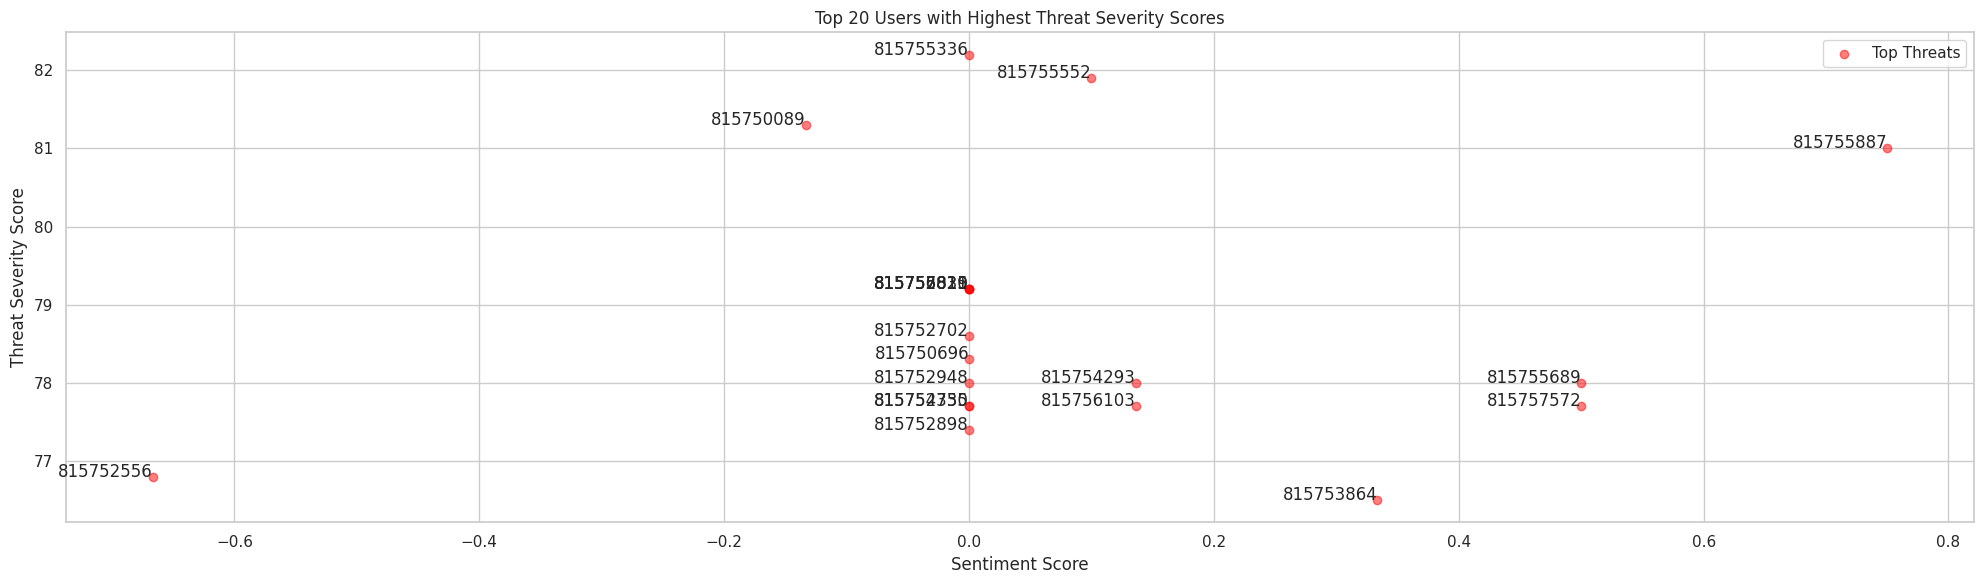

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Your functions and dataset loading here...

# Your threat classification logic...

# Train-test split...
# Linear Regression model training...

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Get the user information for the users classified as actual threats
actual_threats = df[df['threat_severity_score'] >= threat_threshold]

# Select top 20 users with highest threat severity scores
top_20_users = actual_threats.nlargest(20, 'threat_severity_score')

# Display user information for top 20 users with highest threat severity scores
plt.figure(figsize=(20, 6))

# Filtered user IDs classified as top threats
filtered_user_ids = top_20_users['unit_id'].values

# Filter the dataset for top 20 users
filtered_df = df[df['unit_id'].isin(filtered_user_ids)]

# Visualize relevant user information with annotated Unit IDs
plt.scatter(filtered_df['sentiment_score'], filtered_df['threat_severity_score'], color='red', alpha=0.5)
for i, txt in enumerate(filtered_df['unit_id']):
    plt.annotate(txt, (filtered_df['sentiment_score'].values[i], filtered_df['threat_severity_score'].values[i]), ha='right')

plt.xlabel('Sentiment Score')
plt.ylabel('Threat Severity Score')
plt.title('Top 20 Users with Highest Threat Severity Scores')
plt.legend(['Top Threats'])
plt.tight_layout()
plt.show()
